In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
from pathlib import Path
root = str(Path.cwd().parent)
sys.path.append(root)

from initializer import annotation_df, languages_set
from ngram_model import NGramsClassifier
from bert_model import TransformerLanguageDetection
from dataset import WILI2018Dataset
from metrics import Metric

Reusing dataset wili_2018 (/Users/kristina/.cache/huggingface/datasets/wili_2018/WiLI-2018 dataset/1.1.0/78d7fe4a9d0a01168e45657f302c776ee0afc0978d44e2c3759f4c4975b845f5)


  0%|          | 0/2 [00:00<?, ?it/s]



# WILI-2018 dataset extracting labels' annotation

In [3]:
annotation_df.head()

,Label,English,Wiki Code,ISO 369-3,German,Language family,Writing system,Remarks,Synonyms,id
0,ace,Achinese,ace,ace,Achinesisch,Austronesian,NaN,NaN,NaN,21
1,afr,Afrikaans,af,afr,Afrikaans,Indo-European,NaN,NaN,NaN,90
2,als,Alemannic German,als,gsw,Alemannisch,Indo-European,NaN,(ursprünglich nur Elsässisch),NaN,221
3,amh,Amharic,am,amh,Amharisch,Afro-Asiatic,NaN,NaN,NaN,123
4,ang,Old English,ang,ang,Altenglisch,Indo-European,NaN,(ca. 450-1100),Angelsächsisch,129


In [4]:
train_set = WILI2018Dataset("train")
test_set = WILI2018Dataset("test")

In [5]:
# !pip install matplotlib

#### Dataset contains equal amount of samples for each language (500 sentences each)

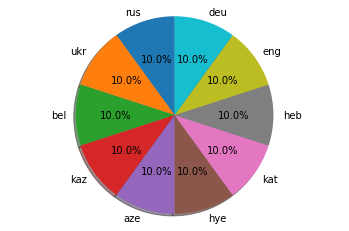

In [6]:
import matplotlib.pyplot as plt
sizes = [10]*10

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=languages_set, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

The datatest is balanced

# Experiments with models

## TfidfVectorizer + LogisticRegression

In [12]:
%%time

model1 = NGramsClassifier()
model1.train(list(train_set))

CPU times: user 4min 37s, sys: 1min 10s, total: 5min 47s
Wall time: 7min 8s


In [13]:
score = model1.test(list(test_set))
print(f"Predicted {model1.metric_score_name}-score: {score}")

Predicted f1-score: 0.9876


## Predict

In [8]:
model_new1 = NGramsClassifier(load_checkpoint_path='../results/n_grams_2022_04_05-04_14_30_PM.joblib')

In [6]:
model_new1.predict_proba([i['sentence'] for i in list(test_set)[:10]])

[{'rus': 0.9336136862895978},
 {'hye': 0.9912336212229991},
 {'eng': 0.8872930009525644},
 {'aze': 0.8798388492971667},
 {'heb': 0.9880881315853616},
 {'bel': 0.8825106750133072},
 {'kat': 0.9921209009826181},
 {'heb': 0.9901148774378457},
 {'rus': 0.9799147537609325},
 {'rus': 0.944499004393118}]

In [15]:
text_example = ['The sea is rough today, be careful, не забудь также взять с собой обед, он на столе']

['The sea is rough today, be careful, не забудь также взять с собой обед, он на столе']

In [16]:
model_new1.predict_proba(text_example)

[{'rus': 0.2778590436306844, 'ukr': 0.23154253764856328}]

In [22]:
text_example = ['In 1978 Johnson was awarded an American Institute of Architects Gold Medal, Менавіта таму М. Здзяхоўскі змог напісаць дзясяткі працаў, дзе даследваў асаблівасці рускай культуры, філасофскай, рэлігійнай і палітычнай думкі']

In [23]:
model_new1.predict_proba(text_example)

[{'bel': 0.7430427587397108}]

# BERT

In [17]:
model2 = TransformerLanguageDetection(device = "cuda")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [10]:
train_loss, val_loss, val_score = model2.train(train_set, epochs=1, learning_rate=8e-3)

Training...:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch 1/1
Train loss 1.800182580947876
Val loss 1.273140788078308 f1-score 0.759765625


Training...: 100%|██████████| 1/1 [00:50<00:00, 50.83s/it]


In [11]:
model2.test(test_set)

Testing...: 100%|██████████| 40/40 [00:46<00:00,  1.17s/it]

Test f1-score 0.7876953125


In [7]:
model_new2 = TransformerLanguageDetection(device = "cpu", load_checkpoint_path="../results/transformer_classifier_2022_04_05-04_19_12_PM.pt")

model_new2.test(test_set)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Test f1-score 0.981640625


## Predict

In [5]:
model_new2 = TransformerLanguageDetection(device = "cpu", load_checkpoint_path="../results/transformer_classifier_2022_04_05-04_19_12_PM.pt")
model_new2.predict([i['sentence'] for i in list(test_set)[:10]])

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

{'hye': ('Սինգապուրի առջև ծառացած խնդիրները՝ բնական պաշարների բացակայությունը, ջրամատակարարումը, որ հիմնականում բերվում էր Մալայզիայից, շատ սահմանափակ պաշտպանողական հնարավորությունները, մարտահրավերներ էին, որոնց առերեսվեցին Լին և ձևավորվող կառավարությունը։',
  0.9940239787101746),
 'eng': ('Anton (or Antonius) Maria Schyrleus (also Schyrl, Schyrle) of Rheita (1604–1660) ((in Czech) Antonín Maria Šírek z Reity) was an astronomer and optician. He developed several inverting and erecting eyepieces, and was the maker of Kepler’s telescope. ""Things appear more alive with the binocular telescope,"" he wrote, ""doubly as exact so to speak, as well as large and bright.""[1] His binocular telescope is the precursor to our binoculars.',
  0.9873249530792236),
 'aze': ('Harri Ceyms Potter (ing. Harry James Potter) — ingilis yazıçı Coan Roulinq tərəfindən yazılmış romanlar seriyasının baş qəhrəmanı, sehrbaz. Öz dünyada o, qüdrətli qara cadugər Lord Voldemorta qalib gələn yeganə sehrbaz kimi tanın

In [6]:

text_example = ['The sea is rough today, be careful, не забудь также взять с собой обед, он на столе']
model_new2.predict(text_example)

{'rus': ('The sea is rough today, be careful, не забудь также взять с собой обед, он на столе',
  0.9365374445915222)}

In [7]:
text_example = ['In 1978 Johnson was awarded an American Institute of Architects Gold Medal, Менавіта таму М. Здзяхоўскі змог напісаць дзясяткі працаў, дзе даследваў асаблівасці рускай культуры, філасофскай, рэлігійнай і палітычнай думкі']
model_new2.predict(text_example)

{'bel': ('In 1978 Johnson was awarded an American Institute of Architects Gold Medal, Менавіта таму М. Здзяхоўскі змог напісаць дзясяткі працаў, дзе даследваў асаблівасці рускай культуры, філасофскай, рэлігійнай і палітычнай думкі',
  0.9807644486427307)}